In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# For Some Styling
sns.set(style="ticks", context="talk")
plt.style.use("dark_background")

In [2]:
df = pd.read_csv(r"Desktop\PGP-DSE Data\Machine Learning\New Datasets\Used Cars Price Prediction\train-data.csv")

In [3]:
df.shape

(6019, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
Unnamed: 0           6019 non-null int64
Name                 6019 non-null object
Location             6019 non-null object
Year                 6019 non-null int64
Kilometers_Driven    6019 non-null int64
Fuel_Type            6019 non-null object
Transmission         6019 non-null object
Owner_Type           6019 non-null object
Mileage              6017 non-null object
Engine               5983 non-null object
Power                5983 non-null object
Seats                5977 non-null float64
New_Price            824 non-null object
Price                6019 non-null float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.4+ KB


In [5]:
# Extracting Manufacturer of the Car
lx = list(df['Name'])
l1 = []
for i in lx:
    a = list(i.split(" "))
    l1.append(a[0])
df['Manufacturer'] = l1

# Extracting Age of the Car
df['Age'] = 2020-df['Year']

# Dropping redundant columns
df.drop(columns=['Unnamed: 0','Name','Year','New_Price'],axis=1,inplace=True)
df.head()

Location  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
0      Mumbai              72000       CNG       Manual      First   
1        Pune              41000    Diesel       Manual      First   
2     Chennai              46000    Petrol       Manual      First   
3     Chennai              87000    Diesel       Manual      First   
4  Coimbatore              40670    Diesel    Automatic     Second   

      Mileage   Engine      Power  Seats  Price Manufacturer  Age  
0  26.6 km/kg   998 CC  58.16 bhp    5.0   1.75       Maruti   10  
1  19.67 kmpl  1582 CC  126.2 bhp    5.0  12.50      Hyundai    5  
2   18.2 kmpl  1199 CC   88.7 bhp    5.0   4.50        Honda    9  
3  20.77 kmpl  1248 CC  88.76 bhp    7.0   6.00       Maruti    8  
4   15.2 kmpl  1968 CC  140.8 bhp    5.0  17.74         Audi    7

In [6]:
df.dropna(axis=0,inplace=True)
print(df.shape)
x = ['Mileage','Engine','Power']
for j in x:
    lx = list(df[j])
    l1 = []
    for i in lx:
        a = list(str(i).split(" "))
        l1.append(a[0])
    df[j] = l1
df.head()

(5975, 12)


Location  Kilometers_Driven Fuel_Type Transmission Owner_Type Mileage  \
0      Mumbai              72000       CNG       Manual      First    26.6   
1        Pune              41000    Diesel       Manual      First   19.67   
2     Chennai              46000    Petrol       Manual      First    18.2   
3     Chennai              87000    Diesel       Manual      First   20.77   
4  Coimbatore              40670    Diesel    Automatic     Second    15.2   

  Engine  Power  Seats  Price Manufacturer  Age  
0    998  58.16    5.0   1.75       Maruti   10  
1   1582  126.2    5.0  12.50      Hyundai    5  
2   1199   88.7    5.0   4.50        Honda    9  
3   1248  88.76    7.0   6.00       Maruti    8  
4   1968  140.8    5.0  17.74         Audi    7

In [7]:
len(df[df['Power']=='null'])

103

In [8]:
# After checking there are still some values in the "Power" column which are affecting our analysis and hence removing them
# from our dataset.
df = df[df['Power']!='null']
print(df.shape)
df['Mileage'] = df['Mileage'].astype(float)
df['Engine'] = df['Engine'].astype(float)
df['Power'] = df['Power'].astype(float)
df.head()

(5872, 12)


Location  Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  \
0      Mumbai              72000       CNG       Manual      First    26.60   
1        Pune              41000    Diesel       Manual      First    19.67   
2     Chennai              46000    Petrol       Manual      First    18.20   
3     Chennai              87000    Diesel       Manual      First    20.77   
4  Coimbatore              40670    Diesel    Automatic     Second    15.20   

   Engine   Power  Seats  Price Manufacturer  Age  
0   998.0   58.16    5.0   1.75       Maruti   10  
1  1582.0  126.20    5.0  12.50      Hyundai    5  
2  1199.0   88.70    5.0   4.50        Honda    9  
3  1248.0   88.76    7.0   6.00       Maruti    8  
4  1968.0  140.80    5.0  17.74         Audi    7

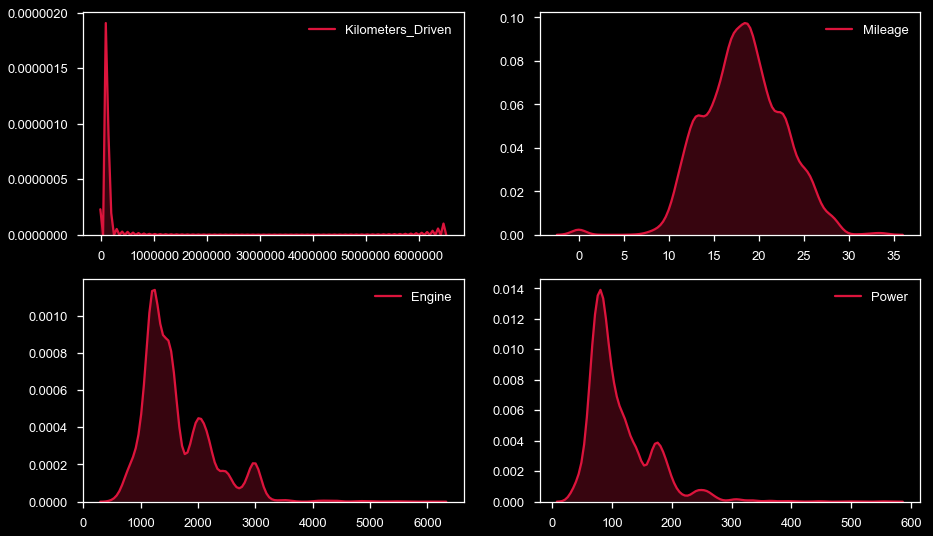

In [18]:
import warnings
warnings.filterwarnings("ignore")
f, axes = plt.subplots(2,2, figsize=(15,9))

sns.kdeplot(df['Kilometers_Driven'],shade=True,ax=axes[0,0],color='crimson')
sns.kdeplot(df['Mileage'],ax=axes[0,1],shade=True,color='crimson')
sns.kdeplot(df['Engine'],ax=axes[1,0],shade=True,color='crimson')
sns.kdeplot(df['Power'],ax=axes[1,1],shade=True,color='crimson')

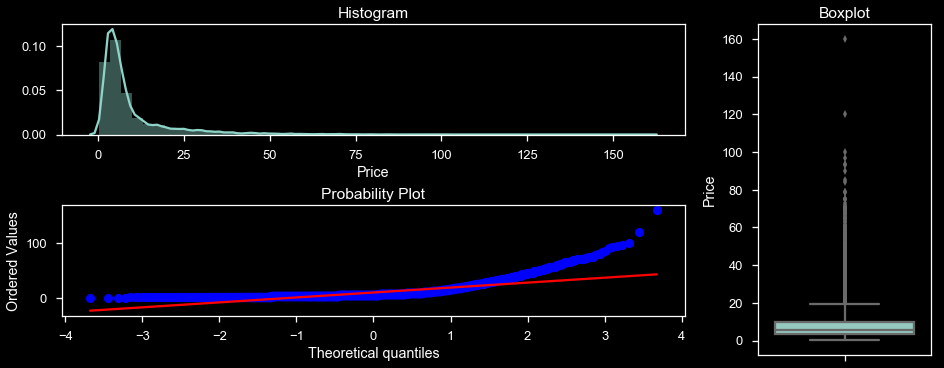

In [19]:
# Target Variable Analysis
import matplotlib.gridspec as gridspec
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
def plotting_3_charts(df1,feature):
    fig = plt.figure(constrained_layout=True,figsize=(13,5))
    grid = gridspec.GridSpec(ncols=3,nrows=3,figure=fig)
    
    ax1 = fig.add_subplot(grid[0,:2])
    ax1.set_title("Histogram")
    sns.distplot(df1.loc[:,feature],norm_hist=True,ax=ax1)
    
    ax2 = fig.add_subplot(grid[1,:2])
    ax2.set_title("Q-Q Plot")
    stats.probplot(df1.loc[:,feature],plot=ax2)
    
    ax3 = fig.add_subplot(grid[:,2])
    ax3.set_title("Boxplot")
    sns.boxplot(df1.loc[:,feature],orient='v',ax=ax3)

plotting_3_charts(df,'Price')

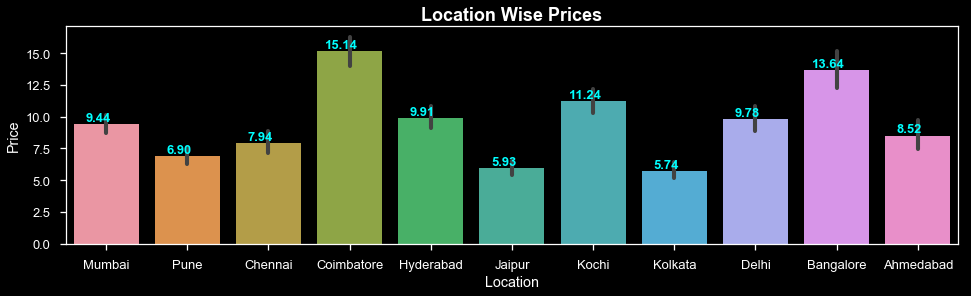

In [20]:
# Prices in Different Location
plt.figure(figsize=(16,4))
graph = sns.barplot(x='Location',y='Price',data=df)
plt.title("Location Wise Prices",fontsize=18,fontweight='bold')
for p in graph.patches:
    graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),ha='center', va='bottom',color= 'cyan',fontsize=13,fontweight='bold')

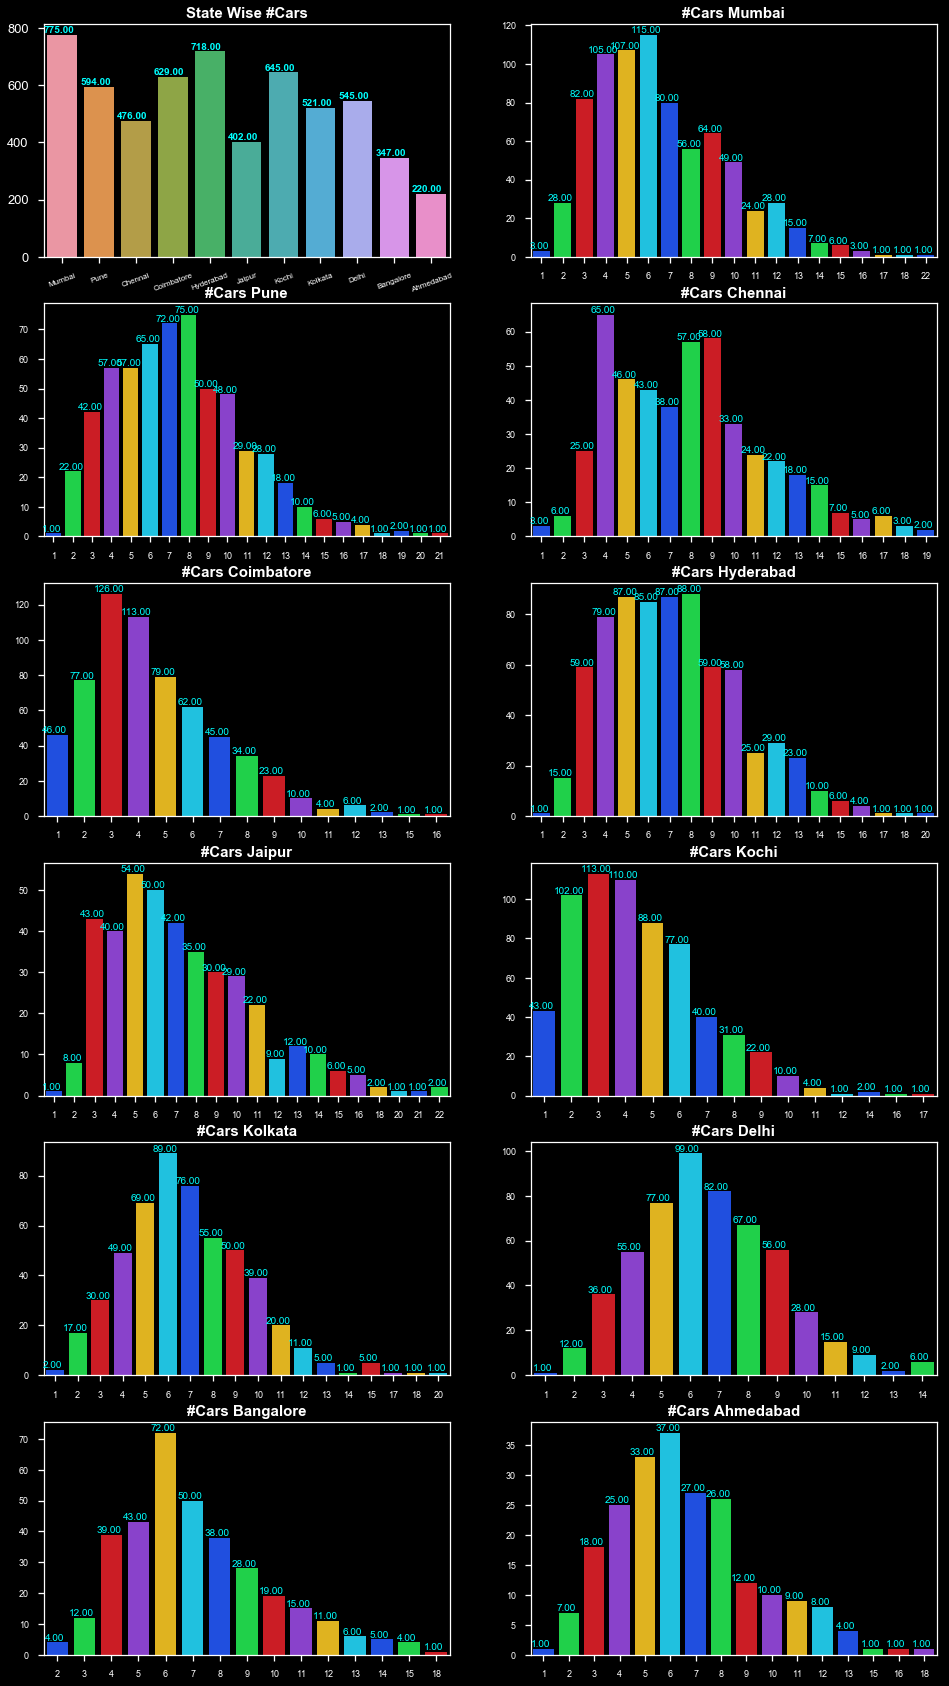

In [21]:
# Count of Cars in Different Locations
import warnings
warnings.filterwarnings("ignore")
f, axes = plt.subplots(6,2, figsize=(16,30))

lx = df['Location'].unique()
k = 0
for i in range(6):
    for j in range(2):
        if i==0 and j==0:
            graph = sns.countplot(x=df['Location'],ax=axes[i,j])
            axes[i,j].set_title("State Wise #Cars",fontsize=15,fontweight='bold')
            axes[i,j].set_xlabel("")
            axes[i,j].set_ylabel("")
            axes[i,j].tick_params(axis='x',labelrotation=20,labelsize=8)
            for p in graph.patches:
                graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),ha='center', va='bottom',color= 'cyan',fontsize=10,fontweight='bold')
        else:
            dfx = df[df['Location']==lx[k]]
            graph = sns.countplot(x='Age',data=dfx,palette='bright',ax=axes[i,j])
            axes[i,j].set_title("#Cars "+lx[k],fontsize=15,fontweight='bold')
            axes[i,j].tick_params(labelsize=9)
            axes[i,j].set_xlabel("")
            axes[i,j].set_ylabel("")
            for p in graph.patches:
                graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),ha='center', va='bottom',color= 'cyan',fontsize=10)
            k = k+1

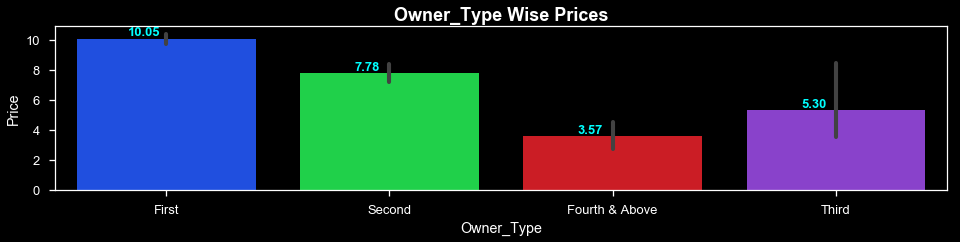

In [22]:
# Prices according to Owner_Type
plt.figure(figsize=(16,3))
graph = sns.barplot(x='Owner_Type',y='Price',data=df,palette='bright')
plt.title("Owner_Type Wise Prices",fontsize=18,fontweight='bold')
for p in graph.patches:
    graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),ha='center', va='bottom',color= 'cyan',fontsize=13,fontweight='bold')

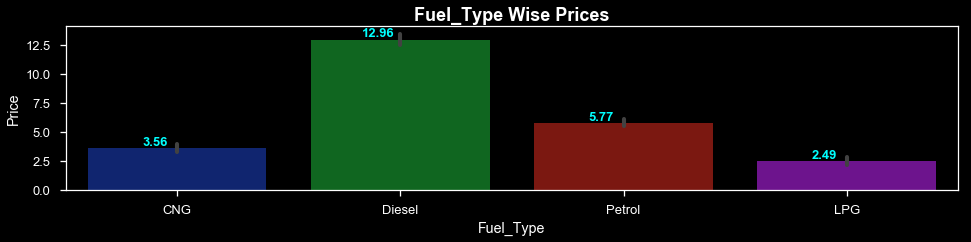

In [23]:
# Price according to Fuel_Type
plt.figure(figsize=(16,3))
graph = sns.barplot(x='Fuel_Type',y='Price',data=df,palette='dark')
plt.title("Fuel_Type Wise Prices",fontsize=18,fontweight='bold')
for p in graph.patches:
    graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),ha='center', va='bottom',color= 'cyan',fontsize=13,fontweight='bold')

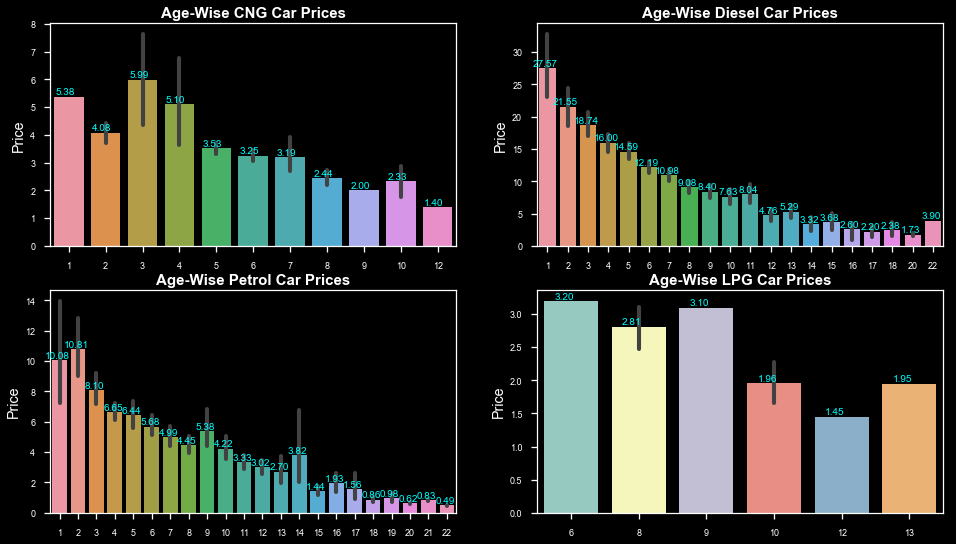

In [24]:
import warnings
warnings.filterwarnings("ignore")
f, axes = plt.subplots(2,2, figsize=(16,9))

lx = df['Fuel_Type'].unique()
k = 0
for i in range(2):
    for j in range(2):
        dfx = df[df['Fuel_Type']==lx[k]]
        graph = sns.barplot(x='Age',y='Price',data=dfx,ax=axes[i,j])
        axes[i,j].set_title("Age-Wise "+lx[k]+" Car Prices",fontsize=15,fontweight='bold')
        axes[i,j].tick_params(labelsize=9)
        axes[i,j].set_xlabel("")
        #axes[i,j].set_ylabel("")
        for p in graph.patches:
            graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),ha='center', va='bottom',color= 'cyan',fontsize=10)
        k = k+1

In [25]:
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.offline as po

#Some Styling
import plotly.io as pio
pio.templates.default = "plotly_dark"
sns.set_style("darkgrid")

In [26]:
# Impact of Mileage on Prices
fig = px.scatter(df,x='Mileage',y='Price',color='Age',height=300,width=950)
fig.update_layout(title={'text':"Price vs Mileage"})
fig.show()

In [27]:
# Impact of Engine on Prices
fig = px.scatter(df,x='Engine',y='Price',color='Age',height=300,width=950)
fig.update_layout(title={'text':"Price vs Engine(cc)"})
fig.show()

In [28]:
# Impact of Power on Prices
fig = px.scatter(df,x='Power',y='Price',color='Age',height=300,width=950)
fig.update_layout(title={'text':"Price vs Power(bhp)"})
fig.show()

In [29]:
# Prices on basis of Kilometers_Driven
fig = px.scatter(df,x='Kilometers_Driven',y='Price',color='Age',height=300,width=950)
fig.update_layout(title={'text':"Price vs Kilometers_Driven"})
fig.show()

In [30]:
# Relation between Engine & Mileage
fig = px.scatter(df,x='Mileage',y='Engine',color='Manufacturer',height=300,width=950)
fig.update_layout(title={'text':"Engine vs Mileage"})
fig.show()

In [31]:
# Relation between Transmission & Mileage
data1 = pd.pivot_table(df,values='Mileage',index='Transmission')
data2 = go.Figure(data=[go.Bar(x=list(data1.index), y=list(data1.values.flatten()),marker_color='teal')])
fig = go.Figure(data=data2)
fig.update_layout(title="Mileage by Transmission",height=300,width=950)
fig.show()

In [32]:
# Prices on basis of Age
data1 = pd.pivot_table(df,values='Price',index='Age')
data2 = go.Figure(data=[go.Bar(x=list(data1.index), y=list(data1.values.flatten()),marker_color='lawngreen')])
fig = go.Figure(data=data2)
fig.update_layout(title="Prices by Age",height=300,width=950)
fig.show()

In [33]:
# Impact of Seats on Prices
data1 = pd.pivot_table(df,values='Price',index='Seats')
data2 = go.Figure(data=[go.Bar(x=list(data1.index), y=list(data1.values.flatten()),marker_color='fuchsia')])
fig = go.Figure(data=data2)
fig.update_layout(title="Prices by Seats",height=300,width=950)
fig.show()

In [34]:
# Prices according to Transmission
data1 = pd.pivot_table(df,values='Price',index='Transmission')
data2 = go.Figure(data=[go.Bar(x=list(data1.index), y=list(data1.values.flatten()),marker_color='fuchsia')])
fig = go.Figure(data=data2)
fig.update_layout(title="Prices by Transmission",height=300,width=950)
fig.show()

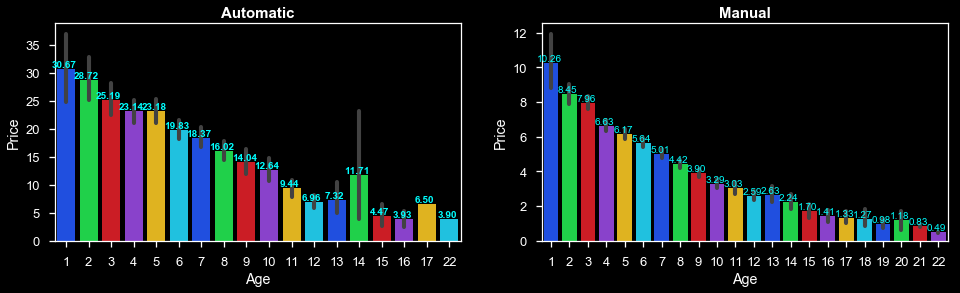

In [37]:
# Price Analysis as Age of a increases for a particular Transmission
import warnings
warnings.filterwarnings("ignore")
f, axes = plt.subplots(1,2, figsize=(16,4))

dfx = df[df['Transmission']=='Automatic']
graph = sns.barplot(x='Age',y='Price',data=dfx,palette='bright',ax=axes[0])
axes[0].set_title("Automatic",fontsize=15,fontweight='bold')
for p in graph.patches:
    graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),ha='center', va='bottom',color= 'cyan',fontsize=10,fontweight='bold')

dfx = df[df['Transmission']=='Manual']
graph = sns.barplot(x='Age',y='Price',data=dfx,palette='bright',ax=axes[1])
axes[1].set_title("Manual",fontsize=15,fontweight='bold')
for p in graph.patches:
    graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),ha='center', va='bottom',color= 'cyan',fontsize=10)

In [38]:
# Prices according to Manufacturer
data1 = pd.pivot_table(df,values='Price',index='Manufacturer')
data2 = go.Figure(data=[go.Bar(x=list(data1.index), y=list(data1.values.flatten()),marker_color='darkgoldenrod')])
fig = go.Figure(data=data2)
fig.update_layout(title="Price by Manufacturer",height=300,width=950)
fig.show()

In [39]:
# Resale Value Analysis using Age along with it
# Taking only Top 15 on basis of number of cars, as below that there aren't enough cars for analysis. If you want, you can
# proceed with all of them.
import operator
lx = list(df['Manufacturer'])
l1 = list(df['Manufacturer'].unique())
l2 = []
for i in l1:
    l2.append(lx.count(i))

manufacturer_price_analysis = sorted(list(zip(l1,l2)),key=operator.itemgetter(1),reverse=True)
manufacturer_price_analysis = manufacturer_price_analysis[:15]
manufacturer_price_analysis = pd.DataFrame(manufacturer_price_analysis,columns=['Manufacturer','#Cars'])

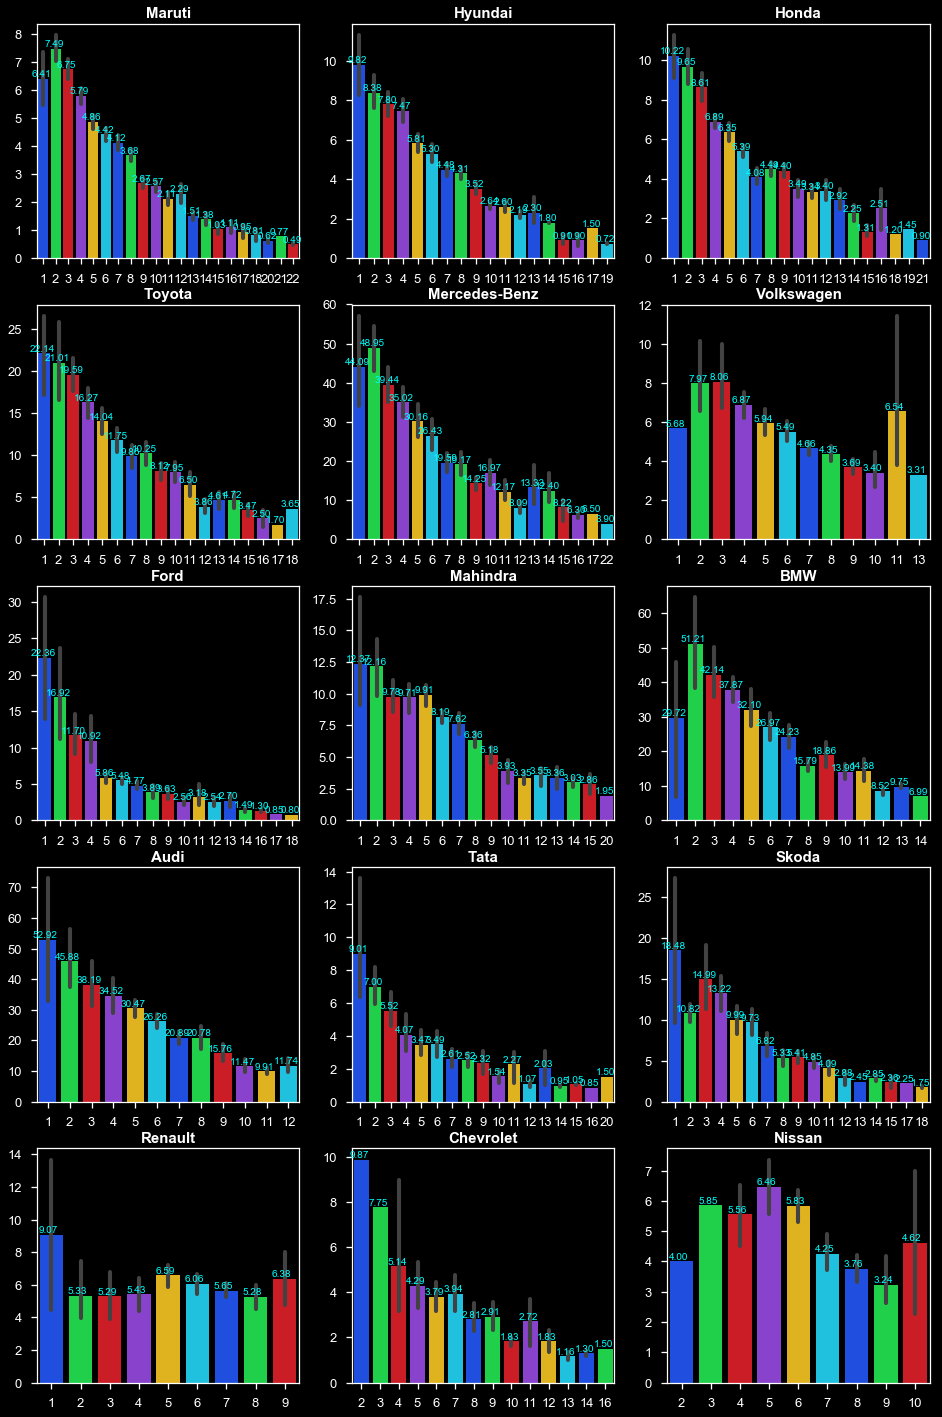

In [40]:
import warnings
warnings.filterwarnings("ignore")
f, axes = plt.subplots(5,3, figsize=(16,25))

lx = manufacturer_price_analysis['Manufacturer'].unique()
k = 0
for i in range(5):
    for j in range(3):
        dfx = df[df['Manufacturer']==lx[k]]
        graph = sns.barplot(x='Age',y='Price',data=dfx,palette='bright',ax=axes[i,j])
        axes[i,j].set_title(lx[k],fontsize=15,fontweight='bold')
        #axes[i,j].set_xticks([])
        axes[i,j].set_xlabel("")
        axes[i,j].set_ylabel("")
        for p in graph.patches:
            graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),ha='center', va='bottom',color= 'cyan',fontsize=10)
        k = k+1

In [41]:
df.head()

Location  Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  \
0      Mumbai              72000       CNG       Manual      First    26.60   
1        Pune              41000    Diesel       Manual      First    19.67   
2     Chennai              46000    Petrol       Manual      First    18.20   
3     Chennai              87000    Diesel       Manual      First    20.77   
4  Coimbatore              40670    Diesel    Automatic     Second    15.20   

   Engine   Power  Seats  Price Manufacturer  Age  
0   998.0   58.16    5.0   1.75       Maruti   10  
1  1582.0  126.20    5.0  12.50      Hyundai    5  
2  1199.0   88.70    5.0   4.50        Honda    9  
3  1248.0   88.76    7.0   6.00       Maruti    8  
4  1968.0  140.80    5.0  17.74         Audi    7

In [42]:
df['Owner_Type'].unique()

array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object)

In [43]:
# Using One-Hot-Encoding as Transmission is not Ordered Data
df['Transmission'].replace({'Manual':0,'Automatic':1},inplace=True)
# Using Label-Encoding as Owner_Type is Ordered Data
df['Owner_Type'].replace({'First':0,'Second':1,'Third':2,'Fourth & Above':3},inplace=True)
# Using One-Hot-Encoding as Location is not Ordered Data
Location = pd.get_dummies(df['Location'],drop_first=True)
# Using One-Hot-Encoding as Fuel_Type is not Ordered Data
Fuel_Type = pd.get_dummies(df['Fuel_Type'],drop_first=True)
# Using One-Hot-Encoding as Manufacturer is not Ordered Data
Manufacturer = pd.get_dummies(df['Manufacturer'],drop_first=True)
df.head()

Location  Kilometers_Driven Fuel_Type  Transmission  Owner_Type  Mileage  \
0      Mumbai              72000       CNG             0           0    26.60   
1        Pune              41000    Diesel             0           0    19.67   
2     Chennai              46000    Petrol             0           0    18.20   
3     Chennai              87000    Diesel             0           0    20.77   
4  Coimbatore              40670    Diesel             1           1    15.20   

   Engine   Power  Seats  Price Manufacturer  Age  
0   998.0   58.16    5.0   1.75       Maruti   10  
1  1582.0  126.20    5.0  12.50      Hyundai    5  
2  1199.0   88.70    5.0   4.50        Honda    9  
3  1248.0   88.76    7.0   6.00       Maruti    8  
4  1968.0  140.80    5.0  17.74         Audi    7

In [252]:
px.box(df,x='Location',y='Price',color='Location',height=400,width=950)

In [254]:
px.box(df,x='Fuel_Type',y='Price',color='Fuel_Type',height=300,width=950)

In [255]:
px.box(df,x='Manufacturer',y='Price',color='Manufacturer',height=400,width=950)

In [155]:
# Data in this column is having a lot of variation and no specific pattern with the Target Variable.
# We will try to build model with and without this column.
# To make a model with this column we would need to perform PCA as there are alot of columns after we perform encoding.

# ==============================================================

# PCA for Full Combined Dataset

# ==============================================================

In [44]:
pca_data = pd.concat([Manufacturer,Location,Fuel_Type],axis=1)

Text(0,0.5,'Cumulative Explained Variance')

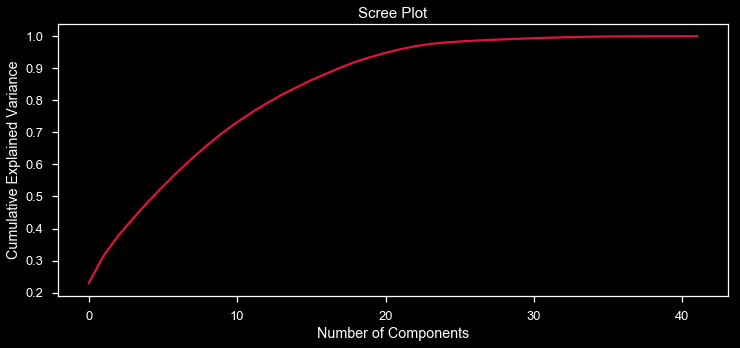

In [45]:
from sklearn.decomposition import PCA

temp_model1 = PCA()
temp_model1.fit(pca_data)
plt.figure(figsize=(12,5))
plt.plot(np.cumsum(temp_model1.explained_variance_ratio_),color='crimson')
plt.title("Scree Plot",fontsize=15)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [84]:
# From the above graph we can infer that, approximately 8 components can cumulatively explain >90% variance.
# Lets's check the cumulative explained variance by 8 components.
print("Cumulative Explained Variance:-",sum(temp_model1.explained_variance_ratio_[:19]))

Cumulative Explained Variance:- 0.9207692328545323


In [47]:
temp_model1 = PCA(n_components=19)
temp_model1.fit(pca_data)
n_components1 = temp_model1.transform(pca_data)
print(n_components1.shape)

(5872, 19)


In [48]:
# Converting the array obtained into a DataFrame
n_components1 = pd.DataFrame(n_components1)
n_components1.head()

0         1         2         3         4         5         6   \
0  0.175518  0.770122  0.171277  0.917091 -0.100207  0.155483 -0.082283   
1 -0.518330 -0.595500 -0.555312  0.161093 -0.191079 -0.060530  0.779185   
2  0.790662 -0.067367  0.555749 -0.504498  0.072396 -0.080370  0.091983   
3 -0.590349  0.746366 -0.342592  0.138298 -0.237011  0.042663  0.065539   
4 -0.725051 -0.138354  0.026475 -0.116791 -0.345666 -0.628568 -0.624078   

         7         8         9         10        11        12        13  \
0 -0.033536 -0.017564 -0.112489  0.076597 -0.153621 -0.028800  0.054523   
1 -0.515802 -0.115754 -0.242873  0.168803 -0.257519 -0.068550 -0.026033   
2  0.171298  0.228687  0.725655  0.586562 -0.476991 -0.075123  0.085148   
3  0.140095  0.187063  0.774548  0.302953 -0.430222 -0.037826  0.061227   
4 -0.184409 -0.046847 -0.153433 -0.012842 -0.076504  0.060160  0.002925   

         14        15        16        17        18  
0 -0.030094  0.004244 -0.056065 -0.053611 -0.014334  
1 -0.001436 -0.032318 -0.097776 -0.046664 -0.014098  
2  0.037639 -0.105381  0.010043 -0.024455  0.037864  
3  0.015553 -0.097518 -0.039949 -0.035091  0.026076  
4 -0.153474  0.057790 -0.080920  0.029144  0.814074

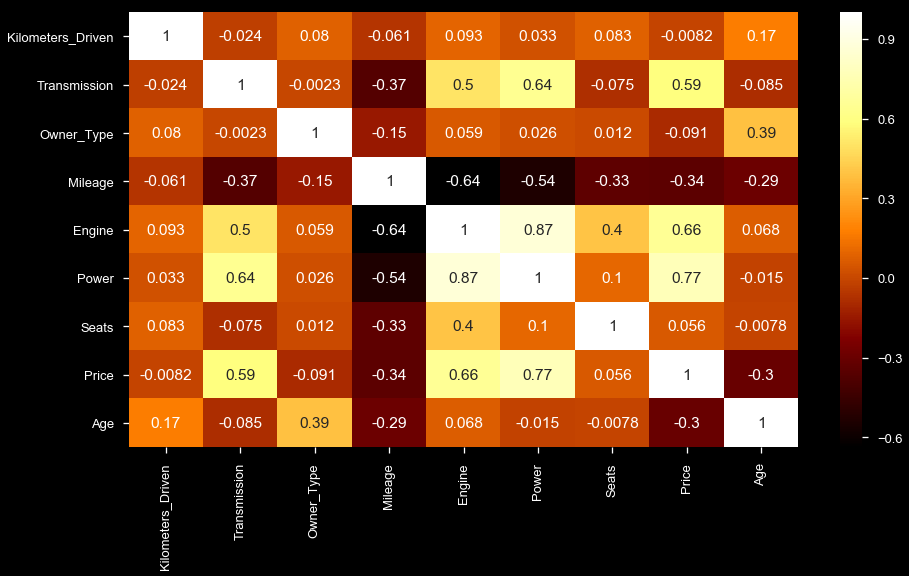

In [259]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,cmap='afmhot')

In [60]:
final_df = pd.concat([n_components1,df],axis=1)
print(final_df.shape)
print(df.shape)
print(n_components1.shape)
pd.set_option('display.max_columns',None)
final_df.head()

(5872, 33)
(5872, 13)
(5872, 20)


index         0         1         2         3         4         5  \
0      0  0.175518  0.770122  0.171277  0.917091 -0.100207  0.155483   
1      1 -0.518330 -0.595500 -0.555312  0.161093 -0.191079 -0.060530   
2      2  0.790662 -0.067367  0.555749 -0.504498  0.072396 -0.080370   
3      3 -0.590349  0.746366 -0.342592  0.138298 -0.237011  0.042663   
4      4 -0.725051 -0.138354  0.026475 -0.116791 -0.345666 -0.628568   

          6         7         8         9        10        11        12  \
0 -0.082283 -0.033536 -0.017564 -0.112489  0.076597 -0.153621 -0.028800   
1  0.779185 -0.515802 -0.115754 -0.242873  0.168803 -0.257519 -0.068550   
2  0.091983  0.171298  0.228687  0.725655  0.586562 -0.476991 -0.075123   
3  0.065539  0.140095  0.187063  0.774548  0.302953 -0.430222 -0.037826   
4 -0.624078 -0.184409 -0.046847 -0.153433 -0.012842 -0.076504  0.060160   

         13        14        15        16        17        18  index  \
0  0.054523 -0.030094  0.004244 -0.056065 -0.053611 -0.014334      0   
1 -0.026033 -0.001436 -0.032318 -0.097776 -0.046664 -0.014098      1   
2  0.085148  0.037639 -0.105381  0.010043 -0.024455  0.037864      2   
3  0.061227  0.015553 -0.097518 -0.039949 -0.035091  0.026076      3   
4  0.002925 -0.153474  0.057790 -0.080920  0.029144  0.814074      4   

     Location  Kilometers_Driven Fuel_Type  Transmission  Owner_Type  Mileage  \
0      Mumbai              72000       CNG             0           0    26.60   
1        Pune              41000    Diesel             0           0    19.67   
2     Chennai              46000    Petrol             0           0    18.20   
3     Chennai              87000    Diesel             0           0    20.77   
4  Coimbatore              40670    Diesel             1           1    15.20   

   Engine   Power  Seats  Price Manufacturer  Age  
0   998.0   58.16    5.0   1.75       Maruti   10  
1  1582.0  126.20    5.0  12.50      Hyundai    5  
2  1199.0   88.70    5.0   4.50        Honda    9  
3  1248.0   88.76    7.0   6.00       Maruti    8  
4  1968.0  140.80    5.0  17.74         Audi    7

# Building Model With PCA Components

In [61]:
X = final_df.drop(columns=['index','Location','Fuel_Type','Manufacturer','Kilometers_Driven','Price'],axis=1)
y = final_df['Price']

In [85]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [106]:
model = RandomForestRegressor(n_estimators=50,max_depth=10).fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Training Score:-",model.score(X_train,y_train))
print("Training Score:-",model.score(X_test,y_test))
print(mean_squared_error(y_test,y_pred))

Training Score:- 0.9743046266817063
Training Score:- 0.8536061266200374
15.358325227531552


In [79]:
model = GradientBoostingRegressor(n_estimators=300,learning_rate=0.25).fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Training Score:-",model.score(X_train,y_train))
print("Training Score:-",model.score(X_test,y_test))
print(mean_squared_error(y_test,y_pred))

Training Score:- 0.9867394422821628
Training Score:- 0.8918038226613985
11.350967370259946


In [103]:
model = XGBRegressor(n_estimators=600,max_depth=6,learning_rate=0.3,objective='reg:squarederror').fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Training Score:-",model.score(X_train,y_train))
print("Training Score:-",model.score(X_test,y_test))
print(mean_squared_error(y_test,y_pred))

Training Score:- 0.9988463933452125
Training Score:- 0.8980928822050924
10.691175948547459


# ==============================================================

# Without Manufacturer Column

# ==============================================================

In [167]:
df.head()

Location  Kilometers_Driven Fuel_Type  Transmission  Owner_Type  Mileage  \
0      Mumbai              72000       CNG             0           0    26.60   
1        Pune              41000    Diesel             0           0    19.67   
2     Chennai              46000    Petrol             0           0    18.20   
3     Chennai              87000    Diesel             0           0    20.77   
4  Coimbatore              40670    Diesel             1           1    15.20   

   Engine   Power  Seats  Price Manufacturer  Age  
0   998.0   58.16    5.0   1.75       Maruti   10  
1  1582.0  126.20    5.0  12.50      Hyundai    5  
2  1199.0   88.70    5.0   4.50        Honda    9  
3  1248.0   88.76    7.0   6.00       Maruti    8  
4  1968.0  140.80    5.0  17.74         Audi    7

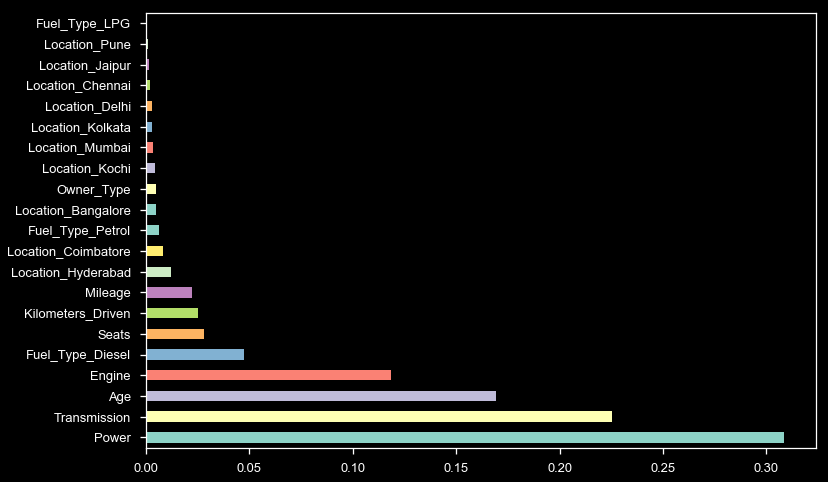

In [241]:
from sklearn.ensemble import ExtraTreesRegressor

feature_selection = ExtraTreesRegressor()
feature_selection.fit(X,y)

plt.figure(figsize = (12,8))
feat_importances = pd.Series(feature_selection.feature_importances_, index=X.columns)
feat_importances.nlargest(21).plot(kind='barh')
plt.show()

In [169]:
df_new = df.drop('Manufacturer',axis=1)
final_df = pd.get_dummies(df_new,drop_first=True)
print(final_df.shape)
print(df.shape)
final_df.head()

(5872, 22)
(5872, 12)


Kilometers_Driven  Transmission  Owner_Type  Mileage  Engine   Power  \
0              72000             0           0    26.60   998.0   58.16   
1              41000             0           0    19.67  1582.0  126.20   
2              46000             0           0    18.20  1199.0   88.70   
3              87000             0           0    20.77  1248.0   88.76   
4              40670             1           1    15.20  1968.0  140.80   

   Seats  Price  Age  Location_Bangalore  Location_Chennai  \
0    5.0   1.75   10                   0                 0   
1    5.0  12.50    5                   0                 0   
2    5.0   4.50    9                   0                 1   
3    7.0   6.00    8                   0                 1   
4    5.0  17.74    7                   0                 0   

   Location_Coimbatore  Location_Delhi  Location_Hyderabad  Location_Jaipur  \
0                    0               0                   0                0   
1                    0               0                   0                0   
2                    0               0                   0                0   
3                    0               0                   0                0   
4                    1               0                   0                0   

   Location_Kochi  Location_Kolkata  Location_Mumbai  Location_Pune  \
0               0                 0                1              0   
1               0                 0                0              1   
2               0                 0                0              0   
3               0                 0                0              0   
4               0                 0                0              0   

   Fuel_Type_Diesel  Fuel_Type_LPG  Fuel_Type_Petrol  
0                 0              0                 0  
1                 1              0                 0  
2                 0              0                 1  
3                 1              0                 0  
4                 1              0                 0

In [191]:
X = final_df.drop('Price',axis=1)
y = final_df['Price']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=25)

In [192]:
model = RandomForestRegressor().fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Training Score:-",model.score(X_train,y_train))
print("Training Score:-",model.score(X_test,y_test))
print(mean_squared_error(y_test,y_pred))

Training Score:- 0.9798802206045769
Training Score:- 0.9101391033481633
11.258441910266113


In [193]:
model = GradientBoostingRegressor().fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Training Score:-",model.score(X_train,y_train))
print("Training Score:-",model.score(X_test,y_test))
print(mean_squared_error(y_test,y_pred))

Training Score:- 0.930709660906102
Training Score:- 0.9131941979061587
10.875676926907142


In [194]:
model = XGBRegressor(n_estimators=600,max_depth=8,learning_rate=0.4,objective='reg:squarederror').fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Training Score:-",model.score(X_train,y_train))
print("Training Score:-",model.score(X_test,y_test))
print(mean_squared_error(y_test,y_pred))

Training Score:- 0.9999957396920168
Training Score:- 0.9311358049850358
8.627818864050546


Building Model without Kilometers_Driven as this column didn't have much correlation with our Target Variable

In [231]:
X = final_df.drop(columns=['Price','Kilometers_Driven'],axis=1)
y = final_df['Price']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=25)

In [232]:
model = RandomForestRegressor().fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Training Score:-",model.score(X_train,y_train))
print("Training Score:-",model.score(X_test,y_test))
print(mean_squared_error(y_test,y_pred))

Training Score:- 0.9791881010269524
Training Score:- 0.9207492145853733
9.929128210132351


In [233]:
model = GradientBoostingRegressor(n_estimators=250,learning_rate=0.25).fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Training Score:-",model.score(X_train,y_train))
print("Training Score:-",model.score(X_test,y_test))
print(mean_squared_error(y_test,y_pred))

Training Score:- 0.9800215299528647
Training Score:- 0.9431909220177617
7.117464083591861


In [234]:
model = XGBRegressor(n_estimators=600,max_depth=8,learning_rate=0.4,objective='reg:squarederror').fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Training Score:-",model.score(X_train,y_train))
print("Training Score:-",model.score(X_test,y_test))
print(mean_squared_error(y_test,y_pred))

Training Score:- 0.9990588046848825
Training Score:- 0.9379956679776051
7.768364174727127


In [235]:
# Here we are able to improve our results a little but from our previous model.